In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

data = pd.read_csv('../input/covid19-tweets/covid19_tweets.csv')

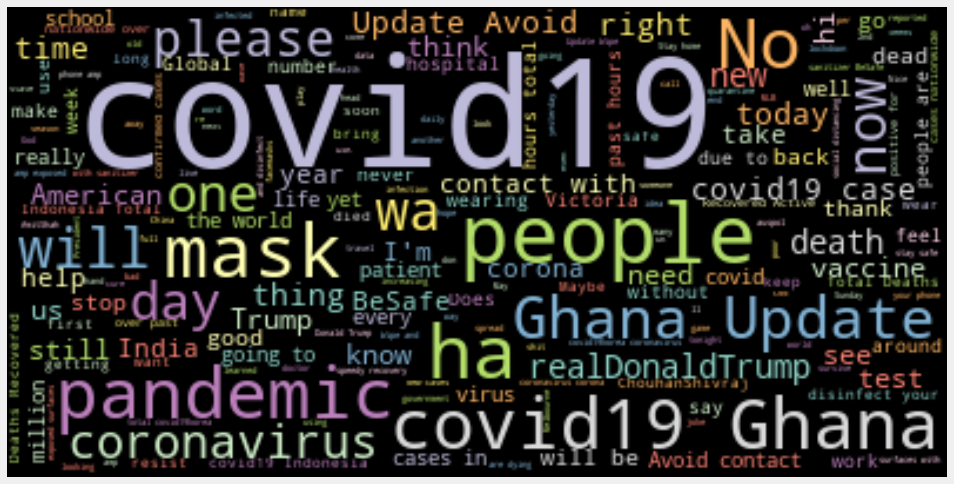

In [2]:
text = ",".join(review for review in data.text if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

# A small look at the Data

In [3]:
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False


# Some quick questions from the data

In [4]:
print('How many posts are made with #covid19? -> {}\n'.format(data.shape[0]))
print('How many unique users have posted? -> {}\n'.format(data.user_name.nunique()))
print('How many unique locations were the posts made from? -> {}\n'.format(data.user_location.nunique()))
print('How many users have more than 1 million followers(higher chances of spread)? -> {}\n'.format(data[data['user_followers']>1000000].user_name.nunique()))
print('How many users are verified(denoting a known person)? -> {}\n'.format(data[data['user_verified']==True].user_name.nunique()))
print('How many tweets are re-tweets? -> {}'.format(data[data['is_retweet']==True].shape[0]))

How many posts are made with #covid19? -> 97710

How many unique users have posted? -> 56780

How many unique locations were the posts made from? -> 17881

How many users have more than 1 million followers(higher chances of spread)? -> 132

How many users are verified(denoting a known person)? -> 4246

How many tweets are re-tweets? -> 0


<p style='font-size:18px;'>Ahead in the notebook I will work on proving each of these questions with the help of appropriate visualizations.</p>

# Description of data

In [5]:
data.describe()

,user_followers,user_friends,user_favourites
count,9.771000e+04,97710.000000,9.771000e+04
mean,1.045292e+05,2181.507256,1.509686e+04
std,8.141692e+05,9650.933428,4.589731e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.700000e+02,154.000000,2.220000e+02
50%,9.800000e+02,552.000000,1.906000e+03
75%,5.240750e+03,1770.000000,9.981000e+03
max,1.389284e+07,497363.000000,2.047197e+06


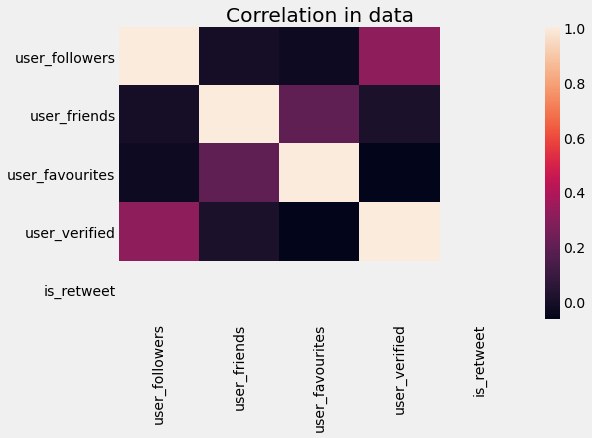

In [6]:
sns.heatmap(data.corr())
plt.title('Correlation in data')
plt.show()

# Missing values in the data

In [7]:
fig = data.isnull().sum().reset_index().plot(kind='bar', x=0, y='index', color=0)
fig.update_layout(title='Mising Values Plot', xaxis_title='Count', yaxis_title='Column Names')
fig.show()

<p style='font-size:16px'>In the description of this dataset it was mentioned tht the tweets crawled have a hashtag of covid19 and so it can be considered that the missing values in the hashtag column contain #covid19 by default<br><br>
The user location and user description won't be contributing much to the sentiment of the tweets either. So there is no such need to fix them.</p>

# Distributions of the data

In [8]:
fig = px.box(data, y="user_followers", color="user_verified",
                   title="User Followers Distribution")
fig.show()

<p style='font-size:18px'>The above box plot is not much interpretable to get information from them about the distribution, so let's plot a kdeplot and check the distribution.</p>

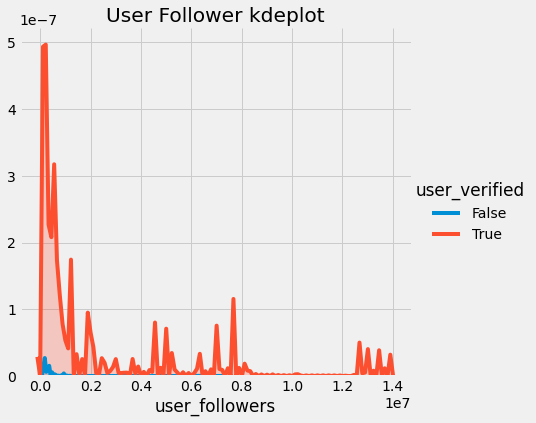

In [9]:
sns.FacetGrid(data, hue="user_verified", height=6,).map(sns.kdeplot, "user_followers" ,shade=True).add_legend()
plt.title('User Follower kdeplot')
plt.show()

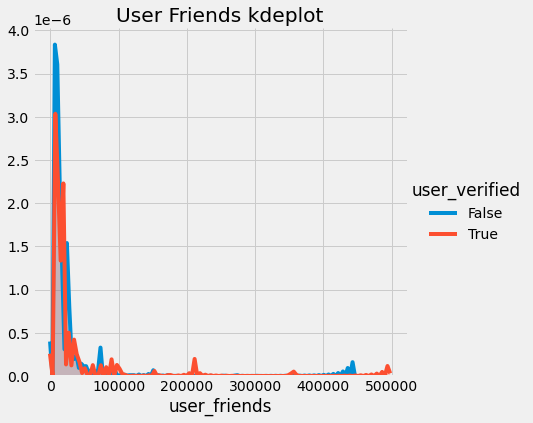

In [10]:
sns.FacetGrid(data, hue="user_verified", height=6,).map(sns.kdeplot, "user_friends" ,shade=True).add_legend()
plt.title('User Friends kdeplot')
plt.show()

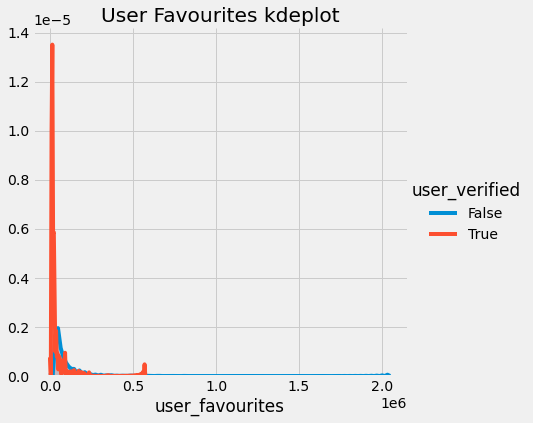

In [11]:
sns.FacetGrid(data, hue="user_verified", height=6,).map(sns.kdeplot, "user_favourites" ,shade=True).add_legend()
plt.title('User Favourites kdeplot')
plt.show()

<p style='font-size:18px'>All the above variables show a highly skewed distribution and this can be expected since it is twitter data and the number of users with a known personality and high number of followers will be much lesser.</p>

In [12]:
fig = data.source.value_counts().reset_index().head(10).plot(kind='bar',x='index',y='source',color='source')
fig.update_layout(title='Top 10 sources of tweets', xaxis_title='Sources', yaxis_title='')
fig.show()

In [13]:
data['text_length'] = data['text'].str.len()
fig = px.violin(data, y="text_length", color="user_verified",
                   title="Text Length Distribution")
fig.show()

In [14]:
fig = data.user_location.value_counts().reset_index().head(10).plot(kind='bar',x='index',y='user_location',color='user_location')
fig.update_layout(title='Top 10 location of tweets', xaxis_title='Locations', yaxis_title='')
fig.show()

In [15]:
data['hashtag_count'] = data['hashtags'].str.split(',').str.len()
data['hashtag_count'] = data['hashtag_count'].fillna(0.0)
fig = data.hashtag_count.value_counts().reset_index().head(7).plot(kind='bar', x='index', y='hashtag_count', color='hashtag_count')
fig.update_layout(title='Hashtag Count Distribution', xaxis_title='Hashtag Counts', yaxis_title='')
fig.show()

<p style='font-size:20px'>The next version of the kernel will consist of the exploration on the text data and also sentiment analysis on text data. Do leave an upvote if you like the analysis so far.</p>